In [212]:
!pip install --quiet nltk

In [213]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import nltk
nltk.download("all", quiet=True)

True

In [214]:
#https://www.gutenberg.org/

In [215]:
url = "https://www.gutenberg.org/files/43/43-h/43-h.htm"

In [216]:
req = requests.get(url)

In [217]:
type(req)

requests.models.Response

In [218]:
html = req.text

In [219]:
soup = BeautifulSoup(html, "html5lib")

In [220]:
type(soup)

bs4.BeautifulSoup

In [221]:
soup.title.string

'The Strange Case Of Dr. Jekyll And Mr. Hyde | Project Gutenberg'

In [222]:
soup.findAll("a")

<ipython-input-222-5ca6d219503b>:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  soup.findAll("a")


[<a href="#chap01">STORY OF THE DOOR</a>,
 <a href="#chap02">SEARCH FOR MR. HYDE</a>,
 <a href="#chap03">DR. JEKYLL WAS QUITE AT EASE</a>,
 <a href="#chap04">THE CAREW MURDER CASE</a>,
 <a href="#chap05">INCIDENT OF THE LETTER</a>,
 <a href="#chap06">INCIDENT OF DR. LANYON</a>,
 <a href="#chap07">INCIDENT AT THE WINDOW</a>,
 <a href="#chap08">THE LAST NIGHT</a>,
 <a href="#chap09">DR. LANYON’S NARRATIVE</a>,
 <a href="#chap10">HENRY JEKYLL’S FULL STATEMENT OF THE CASE</a>,
 <a name="chap01"></a>,
 <a name="chap02"></a>,
 <a name="chap03"></a>,
 <a name="chap04"></a>,
 <a name="chap05"></a>,
 <a name="chap06"></a>,
 <a name="chap07"></a>,
 <a name="chap08"></a>,
 <a name="chap09"></a>,
 <a name="chap10"></a>]

In [223]:
text = soup.get_text()

In [224]:
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")

In [225]:
tokens = tokenizer.tokenize(text)

In [226]:
len(tokens)

26163

In [227]:
words = []

In [228]:
for word in tokens:
  words.append(word.lower())

In [229]:
words[:9]

['the', 'strange', 'case', 'of', 'dr', 'jekyll', 'and', 'mr', 'hyde']

In [230]:
len(words)

26163

In [231]:
sw = nltk.corpus.stopwords.words("english")

In [232]:
len(sw)

198

In [233]:
words2 = []

In [234]:
for word in words:
  if word not in sw:
    words2.append(word)

In [235]:
words2[:7]

['strange', 'case', 'dr', 'jekyll', 'mr', 'hyde', 'project']

<Axes: xlabel='Samples', ylabel='Counts'>

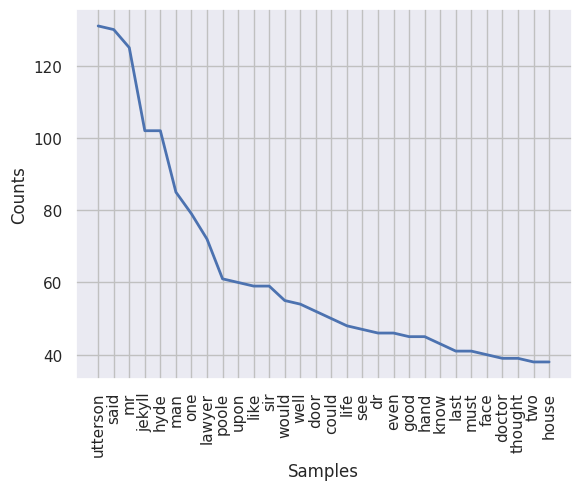

In [236]:
sns.set(color_codes=True)
freqDist = nltk.FreqDist(words2)
freqDist.plot(30)

In [237]:
def plot_words(url):
  req = requests.get(url)
  html = req.text
  soup = BeautifulSoup(html, "html5lib")
  text = soup.get_text()
  tokenizer = nltk.tokenize.RegexpTokenizer("\w+")
  tokens = tokenizer.tokenize(text)
  words = []
  for word in tokens:
    words.append(word.lower())
  sw = nltk.corpus.stopwords.words("english")
  words2 = []
  for word in words:
    if word not in sw:
      words2.append(word)
  freqDist = nltk.FreqDist(words2)
  freqDist.plot(20)

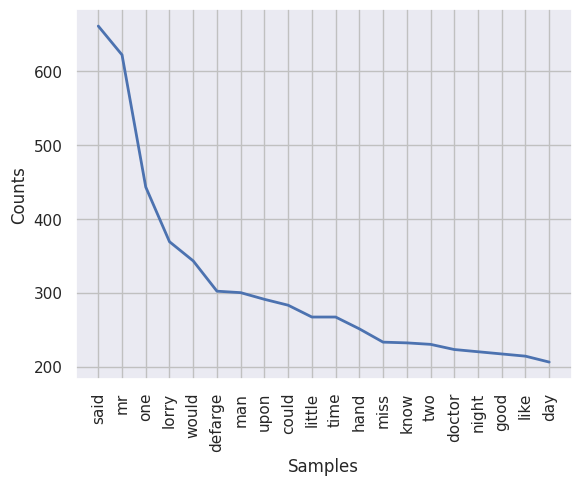

In [238]:
plot_words("https://www.gutenberg.org/files/98/98-h/98-h.htm")

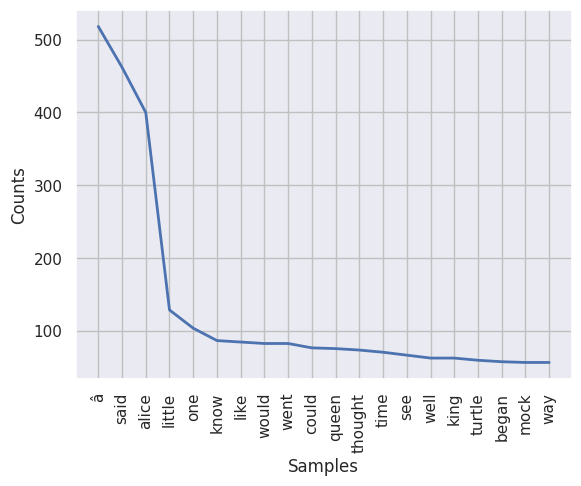

In [239]:
plot_words("https://www.gutenberg.org/files/11/11-h/11-h.htm")

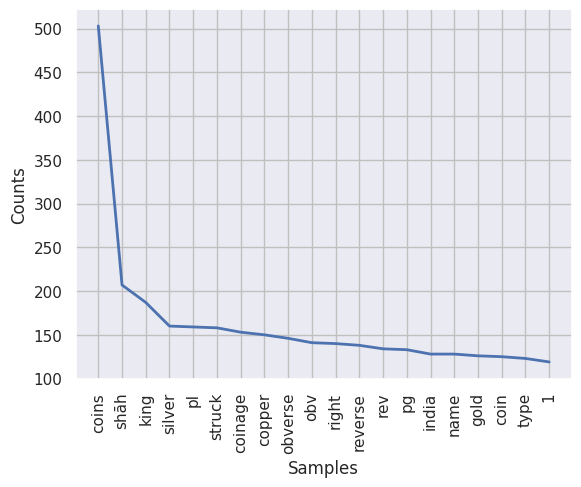

In [240]:
plot_words("https://www.gutenberg.org/cache/epub/75542/pg75542-images.html")

In [241]:
import random

#importing and downloading everything at once, may take a few minutes
import nltk
nltk.download("all", quiet=True)

True

In [242]:
documents = [(list(nltk.corpus.movie_reviews.words(fileid)), category)
              for category in nltk.corpus.movie_reviews.categories()
              for fileid in nltk.corpus.movie_reviews.fileids(category)]

In [243]:
random.shuffle(documents)

In [244]:
#documents[0][0]

In [245]:
all_words = []

In [246]:
for w in nltk.corpus.movie_reviews.words():
  all_words.append(w.lower())

In [247]:
all_words = nltk.FreqDist(all_words)

In [248]:
print(all_words.most_common(10))

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822)]


In [249]:
print(all_words["bad"])

1395


In [250]:
print(all_words["good"])

2411


In [251]:
word_feats = list(all_words.keys())[:2500]

In [252]:
def find_feats(document):
  words = set(document)
  feats = {}
  for w in word_feats:
    feats[w] = (w in words)

  return feats

In [253]:
feat_set = [(find_feats(rev), category) for (rev,category) in documents]

In [254]:
type(feat_set)

list

In [255]:
#feat_set

In [256]:
len(feat_set)

2000

In [257]:
0.75*2000

1500.0

In [258]:
trainer = feat_set[:1500]

tester = feat_set[1500:]

In [259]:
classifier = nltk.NaiveBayesClassifier.train(trainer)

In [260]:
print("Accuracy of Classifier Percentage:", (nltk.classify.accuracy(classifier, tester))*100)

Accuracy of Classifier Percentage: 81.8


In [261]:
classifier.show_most_informative_features(20)

Most Informative Features
                bothered = True              neg : pos    =      9.0 : 1.0
                 frances = True              pos : neg    =      7.7 : 1.0
                  turkey = True              neg : pos    =      7.3 : 1.0
                  annual = True              pos : neg    =      7.0 : 1.0
                   groan = True              neg : pos    =      7.0 : 1.0
                everyday = True              pos : neg    =      6.6 : 1.0
                   waste = True              neg : pos    =      6.3 : 1.0
           unimaginative = True              neg : pos    =      6.3 : 1.0
               atrocious = True              neg : pos    =      6.2 : 1.0
              schumacher = True              neg : pos    =      6.2 : 1.0
                obstacle = True              pos : neg    =      5.7 : 1.0
                 jumbled = True              neg : pos    =      5.7 : 1.0
                    mena = True              neg : pos    =      5.7 : 1.0